In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [86]:
data = pd.read_csv('../artifacts/singlish_reviews.csv', encoding='ISO-8859-1')

In [87]:
data.tail()

,Review (Singlish),Sentiment
1015,Hodta pack krl tibba..penumth 4to eka wagemaii..,1
1016,Supiri,1
1017,Supiri badu,1
1018,travel karana ayata maru,1
1019,kiyala thibba widihatama thiye,1


## Data Preprocessing

In [88]:
data.shape

(1020, 2)

In [89]:
data.duplicated() .sum()

np.int64(168)

In [90]:
data = data.drop_duplicates()

In [91]:
data.duplicated() .sum()

np.int64(0)

In [92]:
print(f"Original rows: {data.shape[0]}, After removing duplicates: {data.shape[0]}")

Original rows: 852, After removing duplicates: 852


In [93]:
data.isnull().sum()

Review (Singlish)    0
Sentiment            0
dtype: int64

### Text Preprocessing

In [94]:
data["Review (Singlish)"].head(5)

0    Material eka bombai! Fit eka perfect! Ithin fu...
1    Phone eka super shiok! Battery life eka long-l...
2    Chilli crab damn shiok! Sedap gila! Confirm or...
3    Delivery eka super fast! Order morning, sampai...
4    Seller responsive sia. Reply damn fast and hel...
Name: Review (Singlish), dtype: object

In [95]:
import re
import string


##### Convert Uppercase to Lowercase

In [96]:
data["Review (Singlish)"] = data["Review (Singlish)"].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [97]:
data["Review (Singlish)"].head(5)

0    material eka bombai! fit eka perfect! ithin fu...
1    phone eka super shiok! battery life eka long-l...
2    chilli crab damn shiok! sedap gila! confirm or...
3    delivery eka super fast! order morning, sampai...
4    seller responsive sia. reply damn fast and hel...
Name: Review (Singlish), dtype: object

#### remove links 

In [98]:
data["Review (Singlish)"] = data["Review (Singlish)"].apply(lambda x: " ".join(re.sub(r'^https?:\/\/.*[\r\n]*', '', x, flags=re.MULTILINE) for x in x.split()))

In [99]:
data["Review (Singlish)"].head(5)

0    material eka bombai! fit eka perfect! ithin fu...
1    phone eka super shiok! battery life eka long-l...
2    chilli crab damn shiok! sedap gila! confirm or...
3    delivery eka super fast! order morning, sampai...
4    seller responsive sia. reply damn fast and hel...
Name: Review (Singlish), dtype: object

#### remove punctuation

In [100]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [101]:
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
        return text 
data["Review (Singlish)"] = data["Review (Singlish)"].apply(remove_punctuations)   

In [102]:
data["Review (Singlish)"].head(5)

0    material eka bombai fit eka perfect ithin full...
1    phone eka super shiok battery life eka long-la...
2    chilli crab damn shiok sedap gila confirm orde...
3    delivery eka super fast order morning, sampai ...
4    seller responsive sia. reply damn fast and hel...
Name: Review (Singlish), dtype: object

#### remove numbers 

In [103]:
data["Review (Singlish)"] = data["Review (Singlish)"].str.replace(r'\d+', '', regex=True)

In [104]:
data["Review (Singlish)"].head(5)

0    material eka bombai fit eka perfect ithin full...
1    phone eka super shiok battery life eka long-la...
2    chilli crab damn shiok sedap gila confirm orde...
3    delivery eka super fast order morning, sampai ...
4    seller responsive sia. reply damn fast and hel...
Name: Review (Singlish), dtype: object

#### remove stopwords

In [30]:
!pip install nltk

  Using cached nltk-3.9.1-py3-none-any.whl.metadata (2.9 kB)
  Using cached click-8.1.8-py3-none-any.whl.metadata (2.3 kB)
  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached regex-2024.11.6-cp312-cp312-win_amd64.whl.metadata (41 kB)
  Using cached tqdm-4.67.1-py3-none-any.whl.metadata (57 kB)
Using cached nltk-3.9.1-py3-none-any.whl (1.5 MB)
Using cached regex-2024.11.6-cp312-cp312-win_amd64.whl (273 kB)
Using cached click-8.1.8-py3-none-any.whl (98 kB)
Using cached joblib-1.4.2-py3-none-any.whl (301 kB)
Using cached tqdm-4.67.1-py3-none-any.whl (78 kB)


In [105]:
import pandas as pd
from nltk.corpus import stopwords
import nltk

In [32]:
nltk.download('stopwords', download_dir='../static/model')

[nltk_data] Downloading package stopwords to ../static/model...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [106]:
with open('../static/model/corpora/stopwords/english', 'r') as file:
    sw = file.read().splitlines()

In [107]:
data["Review (Singlish)"] = data["Review (Singlish)"].apply(lambda x: " ".join(x for x in x.split() if x not in sw))

In [108]:
data["Review (Singlish)"].tail(5)

1009                                  ganata watinwa
1015    hodta pack krl tibba..penumth eka wagemaii..
1017                                     supiri badu
1018                        travel karana ayata maru
1019                  kiyala thibba widihatama thiye
Name: Review (Singlish), dtype: object

#### Stemming

In [109]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()

In [110]:
data["Review (Singlish)"] = data["Review (Singlish)"].apply(lambda x: " ".join(ps.stem(x) for x in x.split()))

In [111]:
data["Review (Singlish)"].tail(5)

1009                                  ganata watinwa
1015    hodta pack krl tibba..penumth eka wagemaii..
1017                                     supiri badu
1018                        travel karana ayata maru
1019                   kiyala thibba widihatama thiy
Name: Review (Singlish), dtype: object

In [112]:
data["Review (Singlish)"].head(5)

0    materi eka bombai fit eka perfect ithin full s...
1    phone eka super shiok batteri life eka long-la...
2    chilli crab damn shiok sedap gila confirm orde...
3    deliveri eka super fast order morning, sampai ...
4         seller respons sia. repli damn fast helpful.
Name: Review (Singlish), dtype: object

### Building Vacabulary

In [113]:
from collections import Counter
vocab = Counter()

In [114]:
vocab

Counter()

In [115]:
for sentence in data['Review (Singlish)']:
    vocab.update(sentence.split())

In [116]:
len(vocab)

1366

In [117]:
data.shape

(852, 2)

In [118]:
len(vocab)

1366

In [119]:
vocab

Counter({'eka': 133,
         'meka': 108,
         'ganna': 85,
         'na': 79,
         'ne': 75,
         'epa': 67,
         'supiri': 58,
         'product': 57,
         'ekak': 48,
         'godak': 47,
         'ganata': 40,
         'hoda': 40,
         'qualiti': 39,
         'hodai': 39,
         'nm': 36,
         'wada': 28,
         'maru': 27,
         'baya': 25,
         'nam': 24,
         'recommend': 23,
         'karanna': 21,
         'meke': 20,
         'weda': 19,
         'wedak': 18,
         'badu': 18,
         'melo': 18,
         'order': 16,
         'hodata': 16,
         'wela': 16,
         'ekk': 16,
         'deliveri': 15,
         'servic': 15,
         'rahak': 15,
         'wadak': 15,
         'puluwan': 14,
         'nathuwa': 13,
         'eke': 12,
         'damag': 12,
         'photo': 12,
         'kisima': 12,
         'supiriyak': 12,
         'una': 11,
         'watinawa': 11,
         'mn': 11,
         'size': 10,
         'price

In [120]:
tokens = [key for key in vocab if vocab[key] > 1]

In [121]:
tokens

['materi',
 'eka',
 'perfect',
 'ithin',
 'satisfi',
 'phone',
 'super',
 'shiok',
 'damn',
 'order',
 'deliveri',
 'fast',
 'seller',
 'respons',
 'sia.',
 'repli',
 'size',
 'cannot',
 'qualiti',
 'money',
 'slow',
 'one',
 'week',
 'custom',
 'servic',
 'chat',
 'ekanam',
 'hondai,',
 'meka',
 'mara',
 'lassanai,',
 'welawatama',
 'una,',
 'meke',
 'build',
 'supiri',
 'ekak,',
 'time',
 'hariyata',
 'dunna',
 'eke',
 'use',
 'karanawa,',
 'godak',
 'practic',
 'wenawa.',
 'supiri,',
 'warranti',
 'watinawa.',
 'menu',
 'athi',
 'product',
 'maru',
 'hithapu',
 'nadda',
 'ekak',
 'karanna',
 'sound',
 'idin',
 'issu',
 'kalin',
 'care',
 'ekata',
 'balaporoththu',
 'eka.',
 'lassanai',
 'hondai',
 'puluwan',
 'price',
 'hari',
 'hodai',
 'wenawa',
 'set',
 'hariyatama',
 'thiyenawa',
 'una',
 'disappoint',
 'ne',
 'aduwata',
 'aya',
 'amarui',
 'thibuna',
 'karaddi',
 'hodata',
 'ganna',
 'hithuwatath',
 'wada',
 'ikmanata',
 'awa',
 'hondata',
 'weda',
 'karanawa',
 'wedak',
 'na',

In [122]:
len(vocab)

1366

In [123]:
len(tokens)

455

In [124]:
def save_vocabulary(lines, filename):
    data = '\n'.join(lines)
    file = open(filename, 'w', encoding="utf-8")
    file.write(data)
    file.close()

save_vocabulary(tokens, '../static/model/vocabulary.txt')

## Divide dataset

In [125]:
data

,Review (Singlish),Sentiment
0,materi eka bombai fit eka perfect ithin full s...,1
1,phone eka super shiok batteri life eka long-la...,1
2,chilli crab damn shiok sedap gila confirm orde...,1
3,"deliveri eka super fast order morning, sampai ...",1
4,seller respons sia. repli damn fast helpful.,1
...,...,...
1009,ganata watinwa,1
1015,hodta pack krl tibba..penumth eka wagemaii..,1
1017,supiri badu,1
1018,travel karana ayata maru,1


In [126]:
x = data['Review (Singlish)']
y = data['Sentiment']

In [127]:
x

0       materi eka bombai fit eka perfect ithin full s...
1       phone eka super shiok batteri life eka long-la...
2       chilli crab damn shiok sedap gila confirm orde...
3       deliveri eka super fast order morning, sampai ...
4            seller respons sia. repli damn fast helpful.
                              ...                        
1009                                       ganata watinwa
1015         hodta pack krl tibba..penumth eka wagemaii..
1017                                          supiri badu
1018                             travel karana ayata maru
1019                        kiyala thibba widihatama thiy
Name: Review (Singlish), Length: 852, dtype: object

In [128]:
y

0       1
1       1
2       1
3       1
4       1
       ..
1009    1
1015    1
1017    1
1018    1
1019    1
Name: Sentiment, Length: 852, dtype: int64

In [57]:
pip install scikit-learn

  Using cached threadpoolctl-3.5.0-py3-none-any.whl.metadata (13 kB)
   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
    --------------------------------------- 0.3/11.1 MB ? eta -:--:--
   --- ------------------------------------ 1.0/11.1 MB 3.3 MB/s eta 0:00:04
   ------ --------------------------------- 1.8/11.1 MB 3.7 MB/s eta 0:00:03
   ---------- ----------------------------- 2.9/11.1 MB 4.2 MB/s eta 0:00:02
   -------------- ------------------------- 3.9/11.1 MB 4.3 MB/s eta 0:00:02
   ----------------- ---------------------- 5.0/11.1 MB 4.6 MB/s eta 0:00:02
   ---------------------- ----------------- 6.3/11.1 MB 4.7 MB/s eta 0:00:02
   -------------------------- ------------- 7.3/11.1 MB 4.8 MB/s eta 0:00:01
   -------------------------------- ------- 8.9/11.1 MB 5.1 MB/s eta 0:00:01
   -------------------------------------- - 10.7/11.1 MB 5.4 MB/s eta 0:00:01
   ---------------------------------------  11.0/11.1 MB 5.5 MB/s eta 0:00:01
   ----------------

In [129]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [130]:
x_train

292                                           wdk n
889                                        eka sira
217                              wadak na.ganna epa
676                            dun mudalata padu ne
270                                   agata hoda ne
                           ...                     
361    meka poto wala tharam koliyiyak na ganna epa
97                          bima wetunath kedenn na
687                                       maru bass
486                   kawruwath ahu wenna epaa muta
234             photo wala penawata wada godak podi
Name: Review (Singlish), Length: 681, dtype: object

In [131]:
x_test.shape

(171,)

In [132]:
x_train.shape

(681,)

### Vectorization

In [133]:
def vectorizer(ds, vocabulary):
    vectorized_lst = []
    
    for sentence in ds:
        sentence_lst = np.zeros(len(vocabulary))
        
        for i in range(len(vocabulary)):
            if vocabulary[i] in sentence.split():
                sentence_lst[i] = 1
                
        vectorized_lst.append(sentence_lst)
        
    vectorized_lst_new = np.asarray(vectorized_lst, dtype=np.float32)
    
    return vectorized_lst_new

In [134]:
vectorized_X_train = vectorizer(x_train, tokens)

In [135]:
vectorized_X_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(681, 455), dtype=float32)

In [136]:
vectorized_X_test = vectorizer(x_test, tokens)

In [137]:
y_train.value_counts()

Sentiment
1    363
0    318
Name: count, dtype: int64

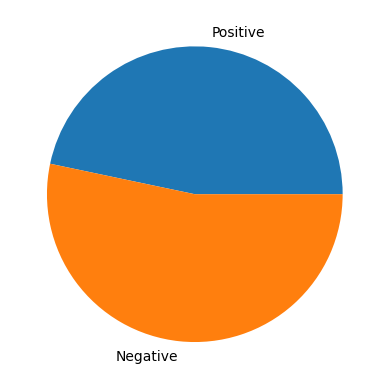

In [138]:
plt.pie(np.array([y_train.value_counts()[0], y_train.value_counts()[1]]), labels=['Positive', 'Negative'])
plt.show()

### Handle imbalanced dataset

In [69]:
!pip install imbalanced-learn

  Using cached imbalanced_learn-0.13.0-py3-none-any.whl.metadata (8.8 kB)
  Using cached sklearn_compat-0.1.3-py3-none-any.whl.metadata (18 kB)
Using cached imbalanced_learn-0.13.0-py3-none-any.whl (238 kB)
Using cached sklearn_compat-0.1.3-py3-none-any.whl (18 kB)


In [139]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
vectorized_X_train_smote, y_train_smote = smote.fit_resample(vectorized_X_train, y_train)
print(vectorized_X_train_smote.shape, y_train_smote.shape)

(726, 455) (726,)


In [140]:
y_train_smote.value_counts()

Sentiment
0    363
1    363
Name: count, dtype: int64

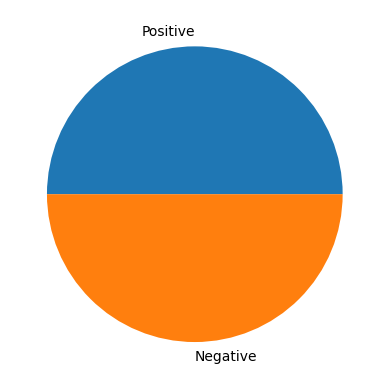

In [141]:
plt.pie(np.array([y_train_smote.value_counts()[0], y_train_smote.value_counts()[1]]), labels=['Positive', 'Negative'])
plt.show()

In [142]:
vectorized_X_train_smote

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], shape=(726, 455), dtype=float32)

In [143]:
y_train_smote

0      0
1      1
2      0
3      1
4      0
      ..
721    0
722    0
723    0
724    0
725    0
Name: Sentiment, Length: 726, dtype: int64

In [144]:
vectorized_X_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(171, 455), dtype=float32)

In [145]:
y_test

298    0
201    0
940    1
255    0
77     0
      ..
456    0
807    1
419    0
597    1
673    1
Name: Sentiment, Length: 171, dtype: int64

# Model Training and Evaluation

In [147]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [148]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

def training_scores(y_act, y_pred):
    acc = round(accuracy_score(y_act, y_pred), 3)
    pr = round(precision_score(y_act, y_pred), 3)
    rec = round(recall_score(y_act, y_pred), 3)
    f1 = round(f1_score(y_act, y_pred), 3)
    print(f'Training Scores:\n\tAccuracy = {acc}\n\tPrecision = {pr}\n\tRecall = {rec}\n\tF1-Score = {f1}')
    
def validation_scores(y_act, y_pred):
    acc = round(accuracy_score(y_act, y_pred), 3)
    pr = round(precision_score(y_act, y_pred), 3)
    rec = round(recall_score(y_act, y_pred), 3)
    f1 = round(f1_score(y_act, y_pred), 3)
    print(f'Testing Scores:\n\tAccuracy = {acc}\n\tPrecision = {pr}\n\tRecall = {rec}\n\tF1-Score = {f1}')

### Logistic Regression

In [149]:
lr = LogisticRegression()
lr.fit(vectorized_X_train_smote, y_train_smote)

y_train_pred = lr.predict(vectorized_X_train_smote)

y_test_pred = lr.predict(vectorized_X_test)

training_scores(y_train_smote, y_train_pred)

validation_scores(y_test, y_test_pred)

Training Scores:
	Accuracy = 0.912
	Precision = 0.886
	Recall = 0.945
	F1-Score = 0.915
Testing Scores:
	Accuracy = 0.836
	Precision = 0.836
	Recall = 0.792
	F1-Score = 0.813


### Naive Bayes

In [150]:
mnb = MultinomialNB()
mnb.fit(vectorized_X_train_smote, y_train_smote)

y_train_pred = mnb.predict(vectorized_X_train_smote)

y_test_pred = mnb.predict(vectorized_X_test)

training_scores(y_train_smote, y_train_pred)

validation_scores(y_test, y_test_pred)

Training Scores:
	Accuracy = 0.902
	Precision = 0.901
	Recall = 0.904
	F1-Score = 0.902
Testing Scores:
	Accuracy = 0.801
	Precision = 0.821
	Recall = 0.714
	F1-Score = 0.764


### Decision Tree

In [151]:
dt = DecisionTreeClassifier()

dt.fit(vectorized_X_train_smote, y_train_smote)

y_train_pred = dt.predict(vectorized_X_train_smote)

y_test_pred = dt.predict(vectorized_X_test)

training_scores(y_train_smote, y_train_pred)

validation_scores(y_test, y_test_pred)

Training Scores:
	Accuracy = 0.97
	Precision = 0.962
	Recall = 0.978
	F1-Score = 0.97
Testing Scores:
	Accuracy = 0.743
	Precision = 0.674
	Recall = 0.831
	F1-Score = 0.744


### Random Forest

In [152]:
rf = RandomForestClassifier()

rf.fit(vectorized_X_train_smote, y_train_smote)

y_train_pred = rf.predict(vectorized_X_train_smote)

y_test_pred = rf.predict(vectorized_X_test)

training_scores(y_train_smote, y_train_pred)

validation_scores(y_test, y_test_pred)

Training Scores:
	Accuracy = 0.97
	Precision = 0.955
	Recall = 0.986
	F1-Score = 0.97
Testing Scores:
	Accuracy = 0.772
	Precision = 0.707
	Recall = 0.844
	F1-Score = 0.769


### Support Vector Machine 

In [153]:
svm = SVC()

svm.fit(vectorized_X_train_smote, y_train_smote)

y_train_pred = svm.predict(vectorized_X_train_smote)

y_test_pred = svm.predict(vectorized_X_test)

training_scores(y_train_smote, y_train_pred)

validation_scores(y_test, y_test_pred)

Training Scores:
	Accuracy = 0.948
	Precision = 0.945
	Recall = 0.95
	F1-Score = 0.948
Testing Scores:
	Accuracy = 0.83
	Precision = 0.843
	Recall = 0.766
	F1-Score = 0.803


In [84]:
import pickle

with open('../static/model/model.pickle', 'wb') as file:
    pickle.dump(mnb, file)
